# Decision-tree-based parameter ranges

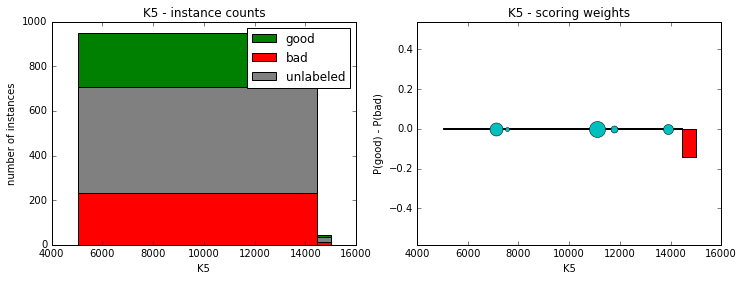

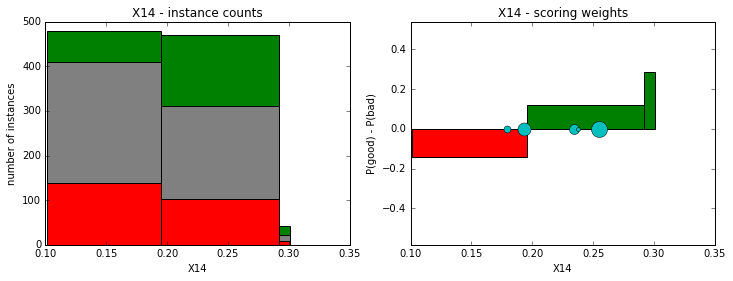

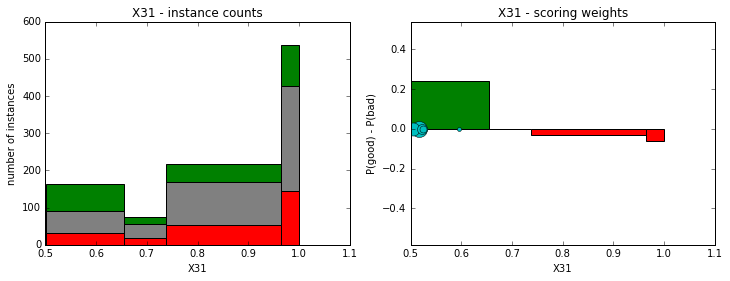

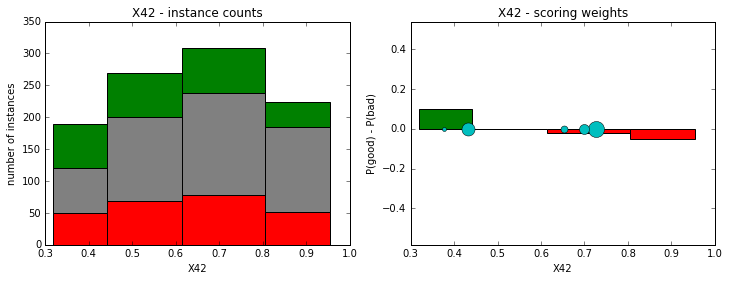

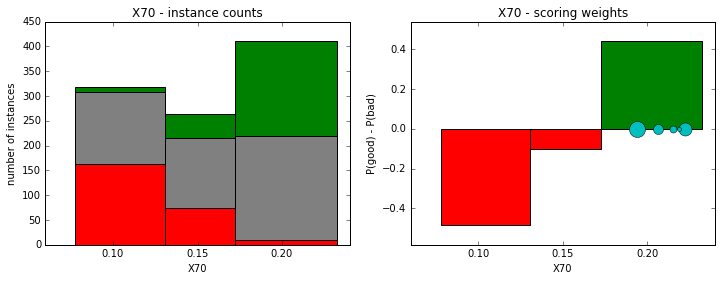

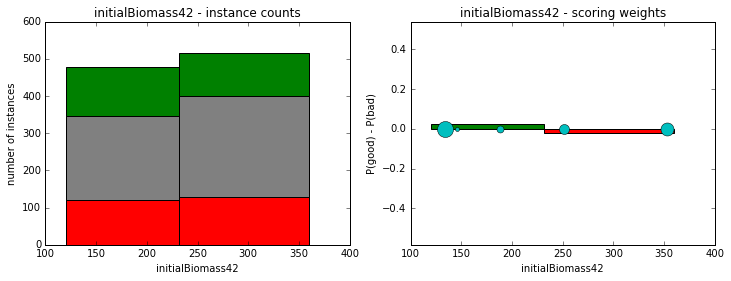

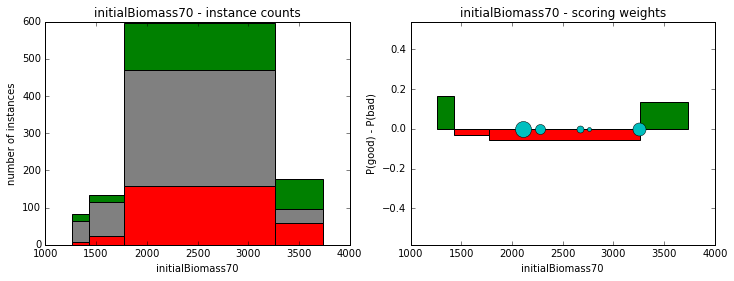

In [3]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

from trees import *
from tree_ranges import * 

set_number = 47
#set_number = 50

tree_file = '../data/set{}/weka-output-j48.txt'.format(set_number)
feature_file = 'features.set{}.labelled.csv'.format(set_number)

tree = parse_weka_j48_output_file(tree_file)
instances = pd.read_csv(feature_file)

# for plotting parameter values of best instances; does not affect other computations
instances.sort_values('environmentScoreSlope200', ascending=False, inplace=True)

distributions = get_distributions(tree, instances)
range_weights = get_range_weights(distributions)

min_weight = 1.0
max_weight = -1.0
for segments in range_weights.values():
    for low, high, weight in segments:
        min_weight = min(weight, min_weight)
        max_weight = max(weight, max_weight)

legend_displayed = False
for param, distribution in sorted(distributions.items()):
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.title(param + " - instance counts")
    plt.xlabel(param)
    plt.ylabel("number of instances")
    left = []; width = []
    bottom_unlabeled = []; bottom_good = []
    height_bad = []; height_unlabeled = []; height_good = []
    for low, high, good, bad, unlabeled in distribution:
        left.append(low)
        width.append(high - low)
        bottom_unlabeled.append(bad)
        bottom_good.append(bad + unlabeled)
        height_bad.append(bad)
        height_unlabeled.append(unlabeled)
        height_good.append(good)    
    plt.bar(left=left, bottom=bottom_good, height=height_good, width=width, color='green', label='good')
    plt.bar(left=left, height=height_bad, width=width, color='red', label='bad')
    plt.bar(left=left, bottom=bottom_unlabeled, height=height_unlabeled, width=width, color='gray', label='unlabeled')
    if not legend_displayed:
        plt.legend()
        legend_displayed = True
    
    ranges = range_weights[param]
    plt.subplot(122)
    plt.title(param + " - scoring weights")
    plt.xlabel(param)
    plt.ylabel("P(good) - P(bad)")
    left = []; height = []; width = []; color = []

    for low, high, weight in ranges:
        left.append(low)
        height.append(weight)
        width.append(high - low)
        color.append('green' if weight > 0 else 'red')
    plt.bar(left=left, height=height, width=width, color=color)
    plt.ylim(min_weight - 0.1, max_weight + 0.1)
    
    # Plot best instances
    for i in range(5):
        plt.plot([instances[param].iloc[i]], [0], 'co', markersize=(16-3*i))